In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import pandas as pd
customer = pd.read_csv('Mall_Customers.csv')
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
custom = customer[['Annual Income (k$)','Spending Score (1-100)']]
custom.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [40]:
custom.shape

(200, 2)

In [41]:
custom.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(custom).transform(custom)
X[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [43]:
from sklearn.cluster import KMeans
distance=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  distance.append(kmeans.inertia_)


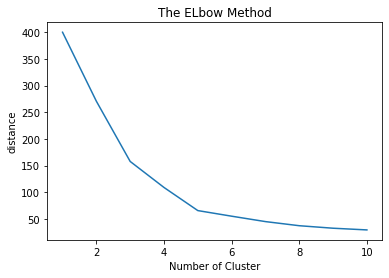

In [45]:
plt.plot(range(1,11), distance)
plt.title('The ELbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('distance')
plt.show()

In [46]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++',n_init=12)
ClusCust = kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

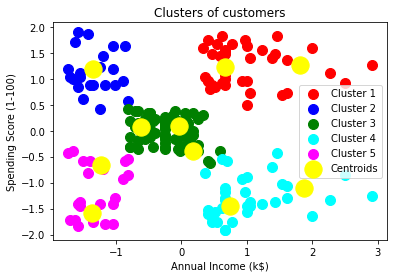

In [47]:
plt.scatter(X[ClusCust == 0, 0], X[ClusCust == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[ClusCust == 1, 0], X[ClusCust == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[ClusCust == 2, 0], X[ClusCust == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[ClusCust == 3, 0], X[ClusCust == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[ClusCust == 4, 0], X[ClusCust == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()